Total distance covered is the energy of a multiparticle problem.

We use Monte Carlo methd to find the shortest round trip.

Simulated annealing is a method in which one tries to aproach the ground state.

(N-1)!/2 different routes have to be considered. 

Calculate shortest route in a number of steps that increases as a polynomial in N

N! increases as N**(1/2)*(N/e)**N

(N**2)*(2**N) number of iterations.

We are looking for the state with the lowest energy. We have to heat up the system and then cool it down very slowly. If the system is always in thermal equilibrium, then it has to reach the lowest energy for T->0.

A transition probability obeys detailed balance with the Boltzmann factor. 

Cool down the system so slowly that it is thermal equilbrium at all time. Time should be large enough that the probability of finding the path S(t) is P(S).

Time can be estimated using Arrhenius Law.

N approaches infinity l = 0.7210 +- 0.0002. 

Speed fast to slow:

Metropolis (T=0) > Threshold > Metropolis

Lengths long to short: 

Eo proportional sqrt(N)

If we only move downhill, there is a high probability that we will end up on a secondary valley far from the absolute minimum.

The monte carlo method  permits uphill steps as well, with a probability that depends on the difference of altitudes. 

T >= delta E/ ln(t/tawnat)

T = Tawnat e^(delta 

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [157]:
L = 15 #length of map
T = L/8 #initial temperature
area = np.random.random([L,L])<0.45
N = np.sum(area)
cities = np.where(area)
print(N)
print(area)

100
[[False False False  True  True False  True  True  True  True False False
   True  True False]
 [ True False  True False False  True False False  True  True False False
  False  True  True]
 [False False  True False False  True False  True False  True False False
   True False False]
 [ True False False False False  True  True  True  True False False False
   True False  True]
 [ True  True False  True  True False  True False  True False False  True
   True  True  True]
 [ True False False  True False  True False False False False False  True
  False False False]
 [False False False False False  True False False False False  True  True
   True False  True]
 [False  True False False  True  True False False  True  True False False
  False False False]
 [False False False False False  True False  True False  True  True  True
  False  True False]
 [ True  True  True False  True  True False False  True False  True False
  False  True  True]
 [False False False  True False False  True  T

In [214]:
L = 15 #length of map
T = L/8 #initial temperature

N=0
for i in range(10000):
    M=100
    if N != M:
        area = np.random.random([L,L])<0.5
        N = np.sum(area)
print(N)
cities = np.where(area)

100


In [234]:
def distance(cities):
    city1,city2 = cities,np.roll(cities,-1,axis=1)
    x1,y1 = city1[0],city1[1]
    x2,y2 = city2[0],city2[1]
    #np.append(x1,x1[0])
    #np.append(x2,x2[0])
    #np.append(y1,y1[0])
    #np.append(y2,y2[0])
    d =  np.sqrt((x2-x1)**2+(y2-y1)**2) 
    return np.sum(d)

def newroute(cities):
    cities_ = np.copy(cities)
    p = np.random.randint(N)
    l = np.random.randint(N//2)
    cities_[0][p:p+l+1] = cities[0][p:p+l+1][::-1]
    cities_[1][p:p+l+1] = cities[1][p:p+l+1][::-1]
    return cities_

def iterate1(cities,T): #threshold 
    cities_ = newroute(cities)
    if distance(cities_)<=distance(cities):
        cities = cities_
    return cities

def iterate2(cities,T): #boltzmann
    cities_ = newroute(cities)
    if T > distance(cities_)-distance(cities):
        cities = cities_
    return cities

def iterate3(cities,T): #boltzmann
    cities_ = newroute(cities)
    if np.random.random() < np.exp(-(distance(cities_)-distance(cities))/T):
        cities = cities_
    return cities

In [216]:
cities1,cities2 = cities,cities
norml1 = []
norml2 = []
Temp = []
iteration = 50000

for i in np.arange(iteration):
    Temp.append(T)
    
    l1 = distance(cities1)/(L*np.sqrt(N))
    l2 = distance(cities2)/(L*np.sqrt(N))
    norml1.append(l1)
    norml2.append(l2)
    
    cities1 = iterate1(cities1,T)
    cities2 = iterate2(cities2,T)
    
    if i % 100 == 0:
        T = T-0.001*T

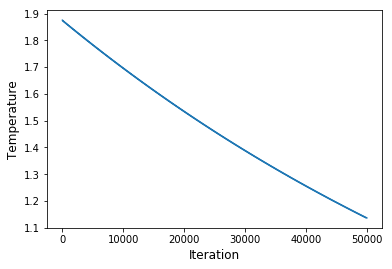

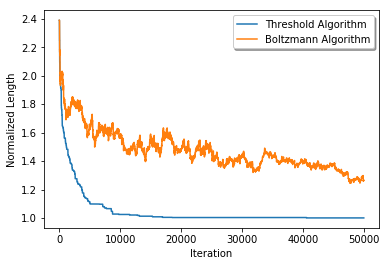

In [217]:
plt.plot(Temp)
plt.xlabel('Iteration',size='large')
plt.ylabel('Temperature',size='large')
plt.show()

plt.plot(norml1,label = 'Threshold Algorithm')
plt.plot(norml2, label = 'Boltzmann Algorithm')
plt.legend(loc='upper right', shadow=True, fontsize='medium')
plt.xlabel('Iteration')
plt.ylabel('Normalized Length')
plt.show()

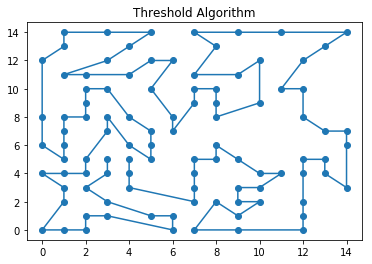

l1 =  1.0006128255844602


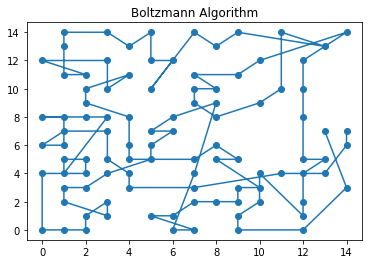

l2 =  1.2650455045429476


In [218]:
plt.title('Threshold Algorithm')
plt.plot(cities1[0],cities1[1],'-o')
plt.show()
print('l1 = ', l1)
plt.title('Boltzmann Algorithm')
plt.plot(cities2[0],cities2[1],'-o')
plt.show()
print('l2 = ', l2)

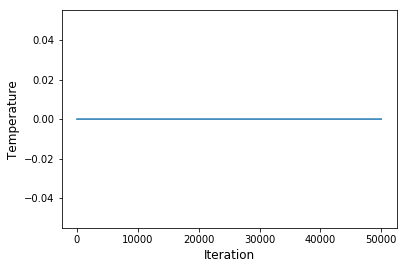

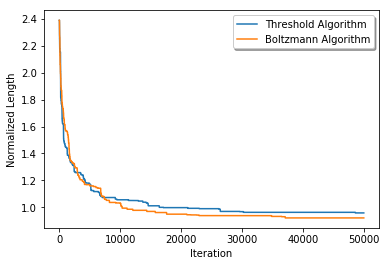

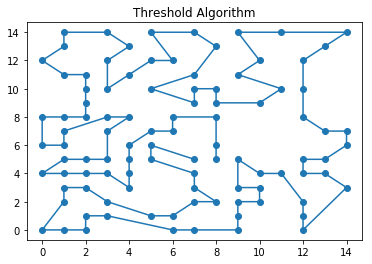

l1 =  0.9580889535855864


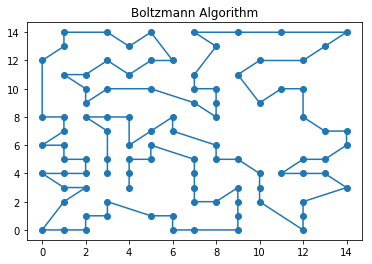

l2 =  0.9209120340421193


In [238]:
T = 0

cities1,cities2 = cities,cities
norml1 = []
norml2 = []
Temp = []
iteration = 50000

for i in np.arange(iteration):
    Temp.append(T)
    
    l1 = distance(cities1)/(L*np.sqrt(N))
    l2 = distance(cities2)/(L*np.sqrt(N))
    norml1.append(l1)
    norml2.append(l2)
    
    cities1 = iterate1(cities1,T)
    cities2 = iterate2(cities2,T)
    
    if i % 100 == 0:
        T = T-0.001*T
        
plt.plot(Temp)
plt.xlabel('Iteration',size='large')
plt.ylabel('Temperature',size='large')
plt.show()

plt.plot(norml1,label = 'Threshold Algorithm')
plt.plot(norml2, label = 'Boltzmann Algorithm')
plt.legend(loc='upper right', shadow=True, fontsize='medium')
plt.xlabel('Iteration')
plt.ylabel('Normalized Length')
plt.show()

plt.title('Threshold Algorithm')
plt.plot(cities1[0],cities1[1],'-o')
plt.show()
print('l1 = ', l1)
plt.title('Boltzmann Algorithm')
plt.plot(cities2[0],cities2[1],'-o')
plt.show()
print('l2 = ', l2)

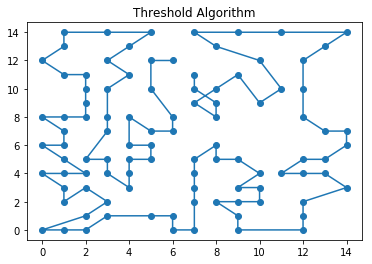

l3 =  0.9154768226720713


In [235]:
cities3 = cities
norml3 = []
iteration = 50000

for i in np.arange(iteration):
    Temp.append(T)
    
    l3 = distance(cities3)/(L*np.sqrt(N))
    norml3.append(l3)
    
    cities3 = iterate3(cities3,T)
    
    if i % 100 == 0:
        T = T-0.001*T

plt.title('Threshold Algorithm')
plt.plot(cities3[0],cities3[1],'-o')
plt.show()
print('l3 = ', l3)



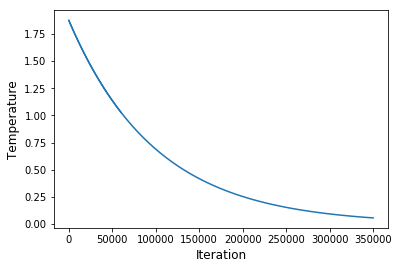

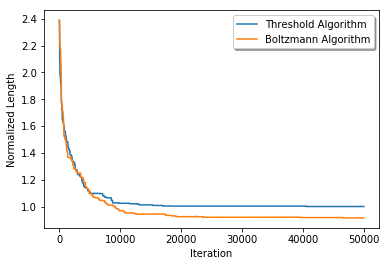

In [236]:
plt.plot(Temp)
plt.xlabel('Iteration',size='large')
plt.ylabel('Temperature',size='large')
plt.show()

plt.plot(norml1,label = 'Threshold Algorithm')
plt.plot(norml3, label = 'Boltzmann Algorithm')
plt.legend(loc='upper right', shadow=True, fontsize='medium')
plt.xlabel('Iteration')
plt.ylabel('Normalized Length')
plt.show()

Animation

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 25 22:32:20 2018

@author: Mary
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

L = 15 #length of map
T = L/8 #initial temperature

N=0
for i in range(10000):
    M=100
    if N != M:
        area = np.random.random([L,L])<0.5
        N = np.sum(area)
print(N)
cities = np.where(area)

iteration = 40000 # number of iterations

def distance(cities):
    city1,city2 = cities,np.roll(cities,-1,axis=1)
    x1,y1 = city1[0],city1[1]
    x2,y2 = city2[0],city2[1]
    d =  np.sqrt((x2-x1)**2+(y2-y1)**2) 
    return np.sum(d)

def newroute(cities):
    cities_ = np.copy(cities)
    p = np.random.randint(N)
    l = np.random.randint(N//2)
    cities_[0][p:p+l+1] = cities[0][p:p+l+1][::-1]
    cities_[1][p:p+l+1] = cities[1][p:p+l+1][::-1]
    return cities_

def iterate1(cities,T): #threshold 
    cities_ = newroute(cities)
    if distance(cities_)<=distance(cities):
        cities = cities_
    return cities

def iterate2(cities,T): #boltzmann
    cities_ = newroute(cities)
    #np.random.random() < T - distance(cities_)-distance(cities)
    if T > distance(cities_)-distance(cities):
        cities = cities_
    return cities

cities1,cities2 = cities,cities
norml1 = []
norml2 = []
ims = []
Temp = []
print(distance(cities1)/(L*np.sqrt(N)))
for i in np.arange(iteration):
    Temp.append(T)
    l1 = distance(cities1)/(L*np.sqrt(N))
    l2 = distance(cities2)/(L*np.sqrt(N))
    
    norml1.append(l1)
    norml2.append(l2)
    
    cities1 = iterate1(cities1,T)
    cities2 = iterate2(cities2,T)
    
    if i % 300 == 0:
        im = plt.plot(cities1[0],cities1[1], '-o')
        ims.append(im)
        
    if i % 100 == 0:
        T = T-0.001*T
        
print(distance(cities1)/(L*np.sqrt(N)))
#plt.plot(cities1[0],cities[1],'o-')
#plt.show()
im_ani = animation.ArtistAnimation(fig, ims, blit=False)
mywriter = animation.FFMpegWriter(fps=5)
plt.show(mywriter)